# TP GDL #1
Ce premier TD permet de se familliariser avec les instructions de base.

Les instructions graphiques de GDL sont identiques à celles d'IDL v7 (pixelisées / raster)

### Pour commencer:

Lancer gdl depuis une fenêtre terminal avec unix>gdl

On accède à l'aide en ligne (sous IDL seulement) avec 

    IDL> ?
ou

    GDL> ? <instruction>

(la notation entre < > est générique, les arguments sont à remplacer par des instructions ou variables IDL/GDL)

On trouvera ici une aide en ligne des commandes IDL (ancienne mais toujours actuelle): http://www.physics.nyu.edu/grierlab/idl_html_help/idl_alph.html

Il y a trois types d'instructions : des fonctions, des procédures, et des commandes de langage. 
Exemples:

    GDL> print, <argument>              ; procédure   
    GDL> <resultat> = exp(<argument>)   ; fonction    
    GDL> if i GT 10 then print, toto    ; commande    



Une procédure effectue une tâche, une fonction retourne une valeur. 

Les commandes permettent de chaîner les instructions.


### Exercice 1

Créez un vecteur x de 200 points avec la fonction findgen. 

Affichez-le avec plot


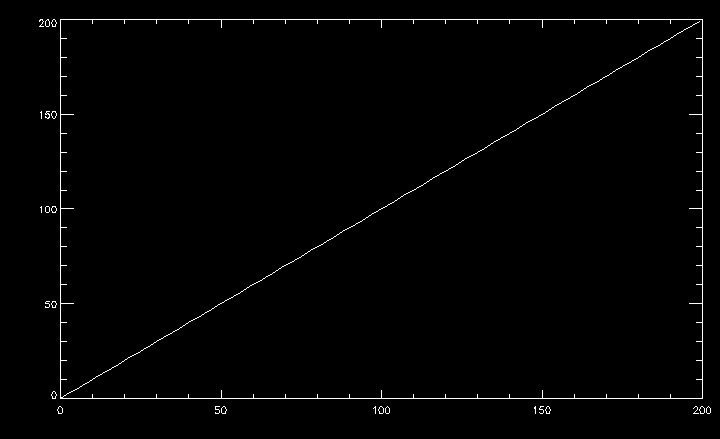

In [0]:
x=findgen(200)
plot, x

Créer un vecteur x2 de 200 points dont les valeurs s'étalent entre 0 et 716


In [1]:
x2=findgen(200)*716/199.

Créer un vecteur Y donnant le sinus de ces valeurs X2 (supposées données en degrés). 

On utilisera la fonction sin, dont l'argument est en radian.



In [2]:
y=sin(x2/180.*!pi)

> Les variables de la forme !* sont des constantes prédéfinies dans IDL, ou des variables d'environnement, par ex !path

Afficher Y(x2)

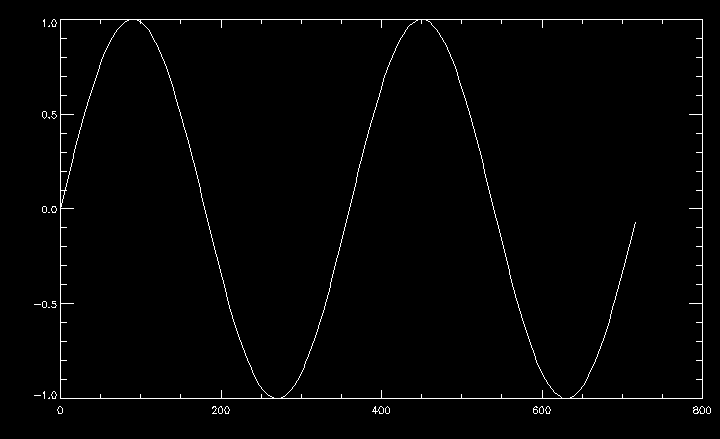

In [3]:
plot, x2, y

Ajouter un titre avec l'option title = 'titre' dans l'instruction plot

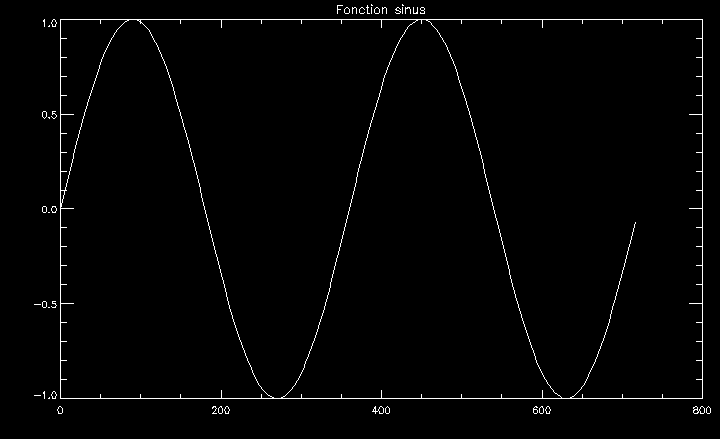

In [4]:
plot, x2, y, title = 'Fonction sinus'

Ajouter une ligne horizontale Y = 0 avec oplot

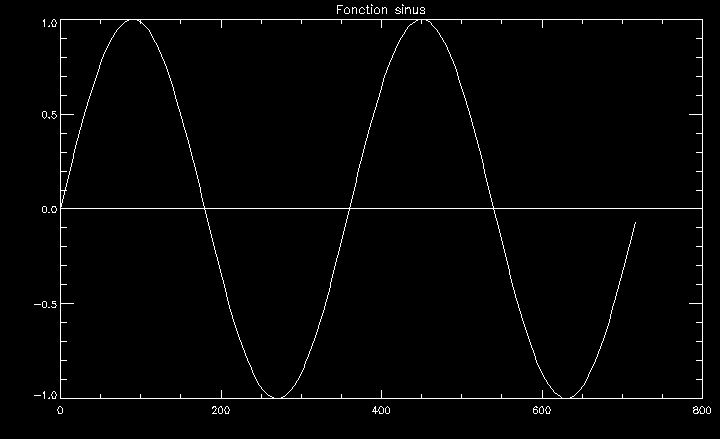

In [5]:
oplot, [0,800],[0,0]

Superposer la fonction cos(X2)/2 avec la procédure oplot


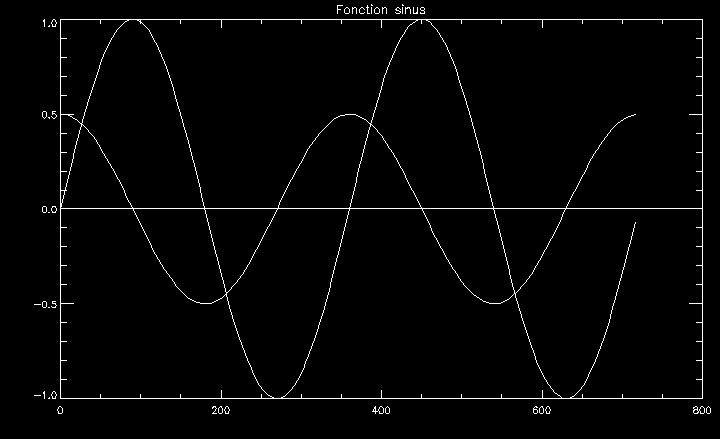

In [6]:
oplot, x2, cos(x2/180.*!pi) /2.

Ajouter une ligne de commentaire/légende avec xyouts

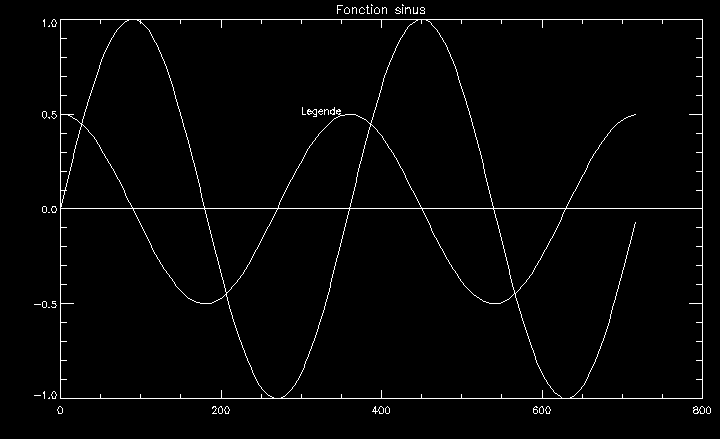

In [7]:
xyouts, 300, 0.5, 'Legende'

Afficher les deux graphiques l’un sous l’autre.

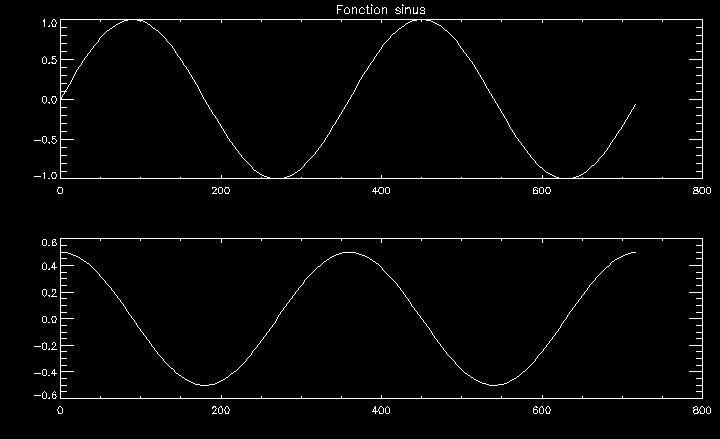

In [8]:
!P.multi = [0,1,2]
plot, x2, y, title = 'Fonction sinus' 
plot, x2, cos(x2/180.*!pi) / 2. 
!P.multi = 0 ; reset

Refaire le graphique en affichant les points individuels avec l'option Psym de plot

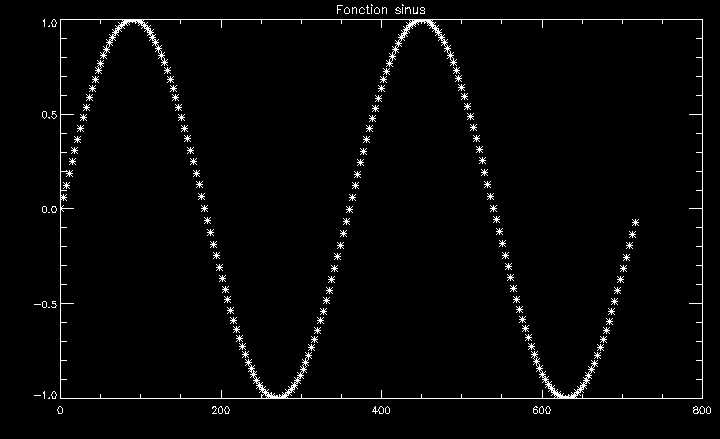

In [9]:
plot, x2, y, title = 'Fonction sinus', psym=2


Sauver vos données (X2 et Y) dans un fichier avec la procédure save. Les relire depuis ce fichier.

In [10]:
save, filename='bidon.dat', X2, Y 
restore, 'bidon.dat', /verb

% RESTORE: Portable (XDR) SAVE/RESTORE file.
% RESTORE: Save file written by serard@Pandora.local, Thu Apr 2 09:46:23 2020.
% RESTORE: IDL version 8.7.1 (darwin, x86_64).
% RESTORE: Restored variable: X2.
% RESTORE: Restored variable: Y.

### Exercice 2

Calculer les valeurs suivantes, et affichez-les avec la procédure print: 

    10+3
    10 - 3
    10.5 * 2
    10 / 3
    
   Que se passe-t-il dans le dernier cas ?

> Attention au résultat de la division entière... 10 / 3 = 3 mais 10. / 3 = 3.33...

Vérifier le type des variables avec help

In [11]:
help, 10+3, 10 -3, 10.5+2, 10/3

LONG = 13
 LONG = 7
 FLOAT = 12.5000
 LONG = 3

Définir les vecteurs $V = \begin{pmatrix} 2 \ 3 \end{pmatrix}$ et $V1 = \begin{pmatrix} 4 \\ 5\end{pmatrix}$

    à l'aide des opérateurs [ et ]


In [12]:
V = [2.,3.]
V1 = [[4.],[5.]]
print, V, V1

2.00000 3.00000
 4.00000
 5.00000


> V est un vecteur-ligne (au lieu d'un vecteur colonne en écriture standard)

Définir le vecteur $V= \begin{pmatrix} 2 \ 3\\ 4 \ 2\end{pmatrix}$

à l'aide des opérateurs [ et ] imbriqués. 

Remarque sur la notation ?

In [13]:
A = [[2.,3],[4,2]]

print, A

2.00000 3.00000
 4.00000 2.00000

> On fournit les lignes l'une après l'autre. Le résultat est transposé par rapport à l'écriture matricielle standard

Calculer et afficher le produit AV avec l'opérateur #

In [14]:
print, A#V

16.0000 12.0000

>  Il s'agit bien de la transposée de l'écriture matricielle

Afficher le produit 2A

Commentaires ?

In [15]:
print, 2*A

4.00000 6.00000
 8.00000 4.00000

> Si l'un des arguments est scalaire, l'opération porte sur tous les éléments de l'autre
argument.

> Si les deux arguments sont des vecteurs/matrices, les opérations se font élément par
élément - sauf la multiplication matricielle qui requiert des dimensions compatibles (comparer A*V et A#V).

### Exercice 3

Lire l'image new_dimes-380.fits avec la fonction readfits (dans la variable a) 

L'afficher avec tvscl

A BYTE = Array[380, 379]

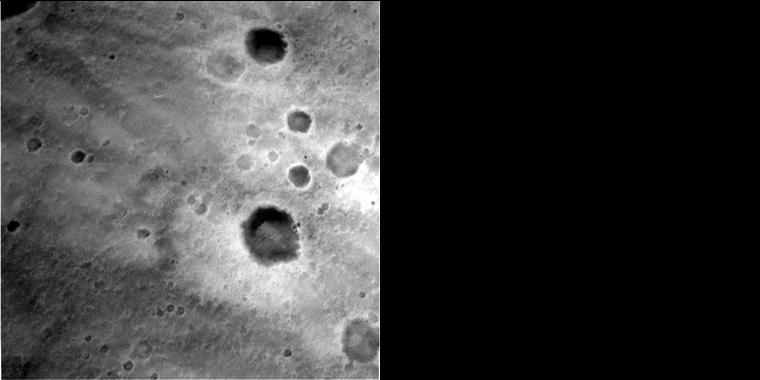

In [16]:
a = readfits(!DATA_DIR+'/'+'new_dimes-380.fits') ; !DATA_DIR indique un chemin sur le disque local
help, a
window, /free, xs=760, ys= 380 ; dimensionne la fenêtre pour contenir 2 images
tvscl, a

Afficher côte à côte A et son logarithme (calculé avec la fonction alog) 

Que se passe-t-il 

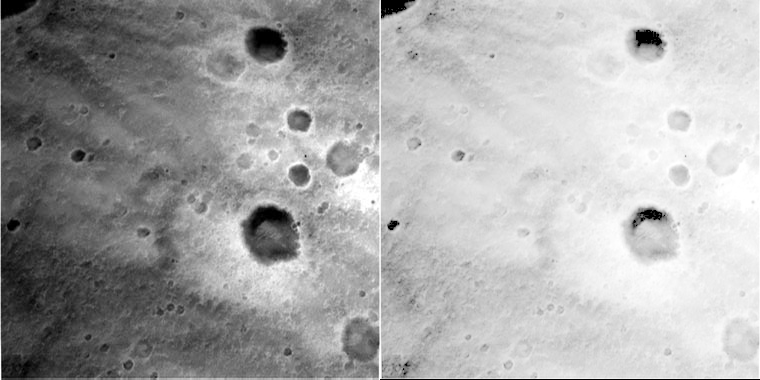

In [17]:
tvscl, a, 0
tvscl, alog(a>1), 1 

> Le log réduit le contraste en écrasant les grandes valeurs. Il faut aussi prendre la précaution de filtrer les valeurs ≤ 0

Afficher côte à côte a et a/2. avec tvscl, puis avec tv 

Que se passe-t-il ?

Idem avec 2.*a

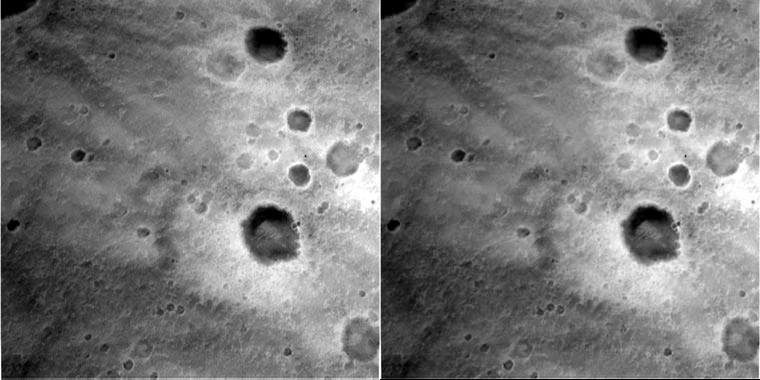

In [18]:
tvscl, a, 0
tvscl, a/2., 1


> Les images sont identiques car tvscl cale l'échelle de gris entre 0 et le max de l'image

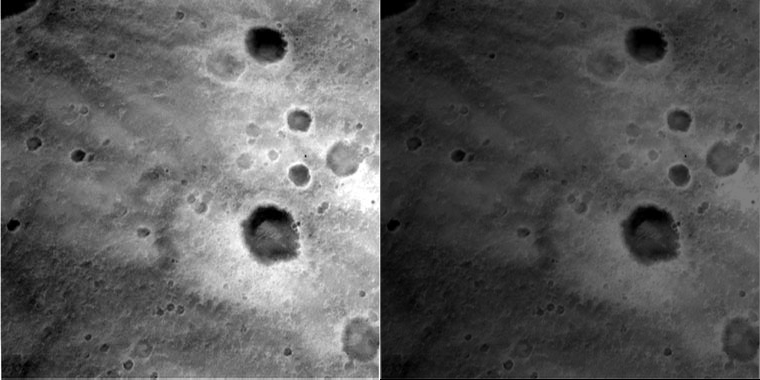

In [19]:
tv, a, 0
tv, a/2., 1


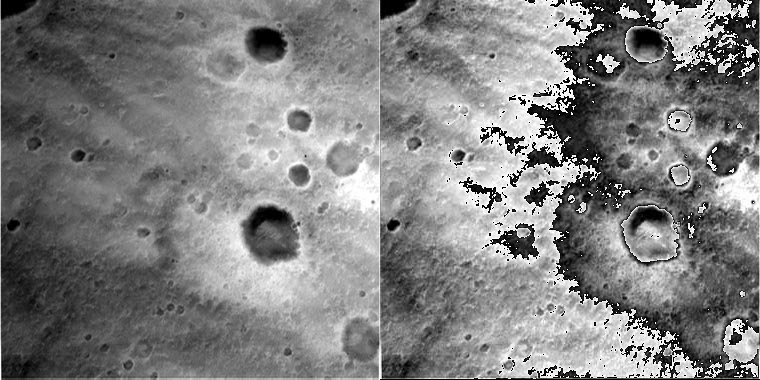

In [20]:
tv, a, 0
tv, a*2., 1


> Avec tv par contre, l'échelle de gris sur 256 niveaux reflète directement les valeurs de l'image. En prenant 2*a, les valeurs débordent cette échelle, qui est repliée en 256.

Afficher côté à côté 2*a et 2*a-100 avec tv 

Que se passe-t-il ?

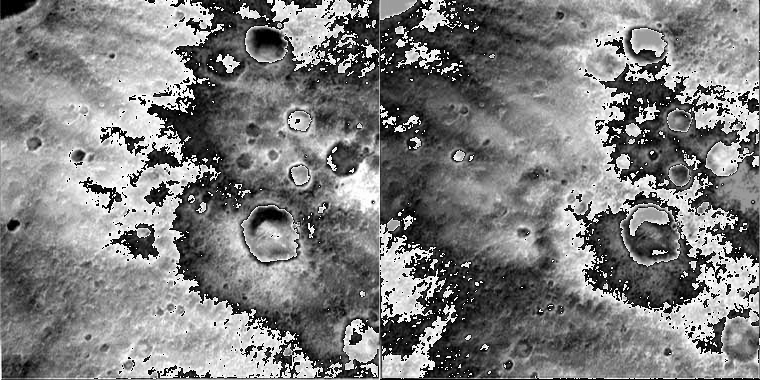

In [21]:
tv, 2.*a, 0
tv, 2.*a-100, 1


> On voit que les 256 gris se décalent dans l'échelle de l'image. Une telle comparaison peut permettre de mettre en évidence des détails.

Lire l'image de démo de M51 de la façon suivante:

    file = FILEPATH('m51.dat', root = '/usr/local/idl', SUBDIRECTORY = ['examples', 'data'])

    a = READ_BINARY(file, DATA_DIMS = [340, 440]) 

Afficher a à la position standard. Déterminer les coordonnées de la petite galaxie avec la procédure rdpix (ou cursor).

<em>(note: il faut cliquer sur le bouton droit pour sortir de rdpix. La rappeler plusieurs fois si elle n’affiche qu’un seul résultat au terminal sous GDL, utiliser cursor en cas de problème)</em>


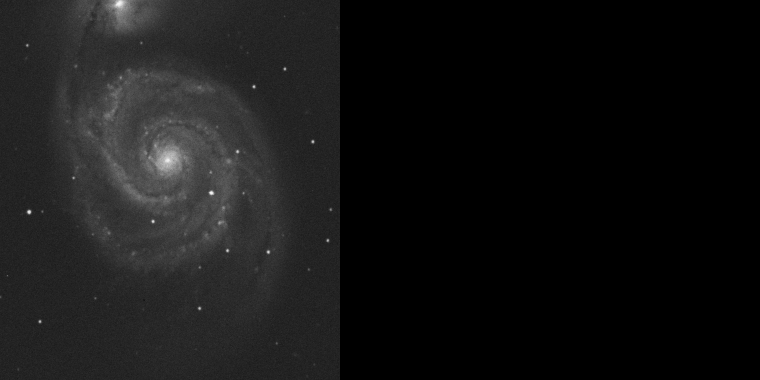

Press left or center mouse button for new output line." ... right mouse button to exit. % CURSOR: Operation invalid on pixmap window: 32. % Execution halted at: $MAIN$

In [22]:
file = FILEPATH('m51.dat', root = '', SUBDIRECTORY = ['examples', 'data']) ; path pour le notebook
a = READ_BINARY(file, DATA_DIMS = [340, 440]) 
erase ; efface explicitement la fenêtre avant un tv
tv, a 
rdpix, a ; ne fonctionne pas dans le notebook!

Afficher séparément cette partie de l'image, puis la dilater d'un facteur 2 avec congrid (on appellera le résultat b)

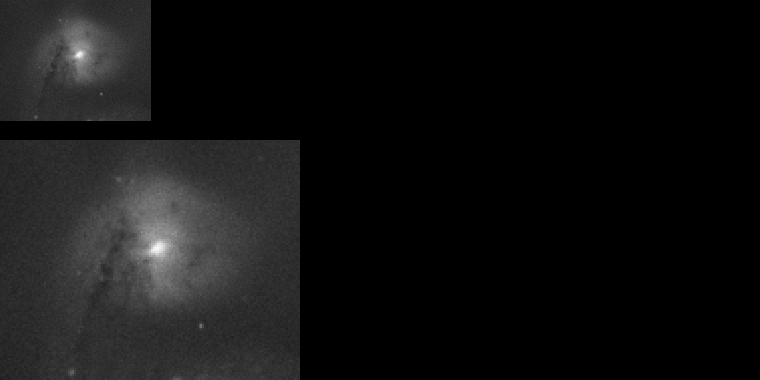

In [23]:
erase
tv, a[40:190, 310:430], 0
b = congrid(a[40:190, 310:430], 2*150, 2*120)
tv, b

Afficher un histogramme des valeurs de b

Superposer l'histogramme de a dans une couleur différente. Quelle est l'origine de la différence ?

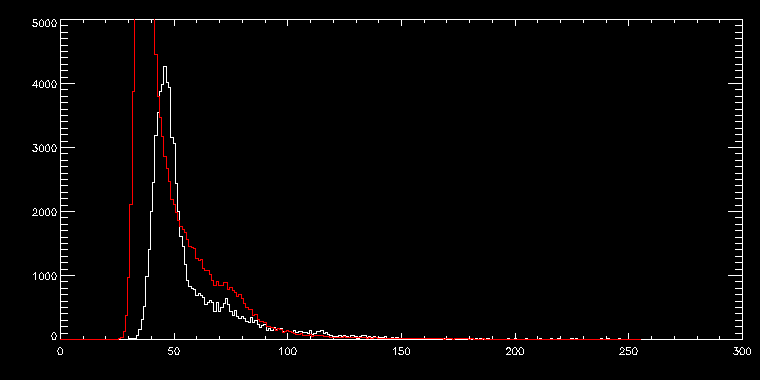

In [24]:
plot, histogram(b), psym=10
loadct, 12 ; table de couleurs simple
oplot, histogram(a), psym=10, col=200

> Le fond de ciel est le niveau le plus faible de l'image, ~30 pas-codeurs

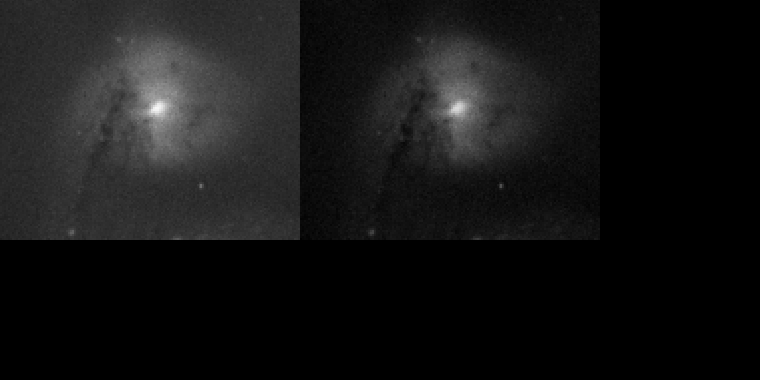

In [25]:
loadct, 0 ; retour à l'échelle de gris
erase ; efface la fenêtre
tv, b, 0
tv, b-30, 1

Afficher la région de la petite galaxie en fil de fer avec surface

Puis l'afficher avec xsurface et la manipuler (Sous IDL seulement)

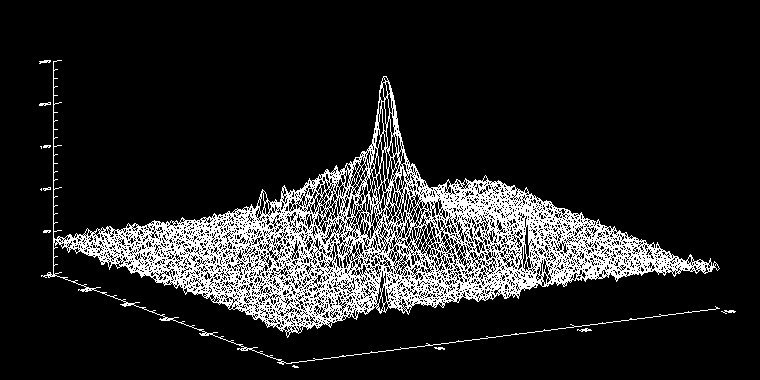

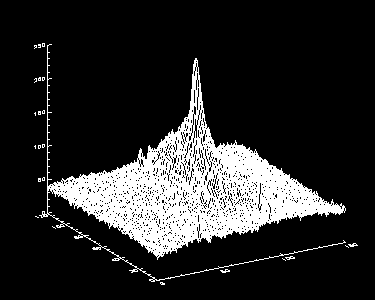

In [26]:
surface, a[40:190, 310:430] 
xsurface, a[40:190, 310:430]